In [47]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

## import du fichier

In [2]:
filename = "Demandeurs d’emploi inscrits en fin de mois à Pôle emploi par Métier - Département _ La Réunion 974 .csv"
data = pd.read_csv(filename, skiprows=3, sep = ";",skipfooter=2,engine = "python")

## Prétraitement du fichier 

In [3]:
# Standardisation des dates
data["Mois"] = pd.date_range(start = "01-01-1996", end = "02-01-2023" ,freq="M") 

#Conversion en type numérique
data.select_dtypes(include = "object").iloc[:,:] = data.select_dtypes(include = "object").applymap(lambda x:x.replace(" ","")).astype("int32")

In [36]:
type_object_columns = data.select_dtypes(include = "object").columns

# Conversion en type int32 de tout les types
data.loc[:,type_object_columns] = data.loc[:,type_object_columns].applymap(lambda x:x.replace(" ","")).astype("int32")

# On va virer les colonnes de totaux

#Toute les colonnes sans les totaux 
mask1 = data.iloc[:,:-2]

#Toute les colonnes sans les totaux et sans la colonne Mois
mask2 = mask1.iloc[:,mask1.columns != "Mois"]

#Toute les colonnes sans les totaux, sans la colonne Mois et sans les lignes entière à 0
mask3 = ~(mask2 == 0).all(axis = 1)

# Utilisons ce mask pour retenir uniquement les lignes sans 0
data = data.loc[mask3,:]


# Suppression des lignes dont le contenu vaut 0

In [39]:
print(data.columns)

Index(['Mois',
       'A1101 : Conduite d'engins d'exploitation agricole et forestière',
       'A1201 : Bûcheronnage et élagage',
       'A1202 : Entretien des espaces naturels',
       'A1203 : Entretien des espaces verts',
       'A1204 : Protection du patrimoine naturel', 'A1205 : Sylviculture',
       'A1301 : Conseil et assistance technique en agriculture',
       'A1302 : Contrôle et diagnostic technique en agriculture',
       'A1303 : Ingénierie en agriculture et environnement naturel',
       ...
       'N1301 : Conception et organisation de la chaîne logistique',
       'N1302 : Responsable de site logistique',
       'N1303 : Technicien logistique',
       'N2101 : Navigation commerciale aérienne',
       'N2102 : Pilotage et navigation technique aérienne',
       'N2201 : Agent d'escale aéroportuaire',
       'N2202 : Contrôle de la navigation aérienne',
       'N2203 : Exploitation des pistes aéroportuaires',
       'N2204 : Préparation des vols',
       'N2205 : Responsa

## Visualisation 

<AxesSubplot: xlabel='Mois'>

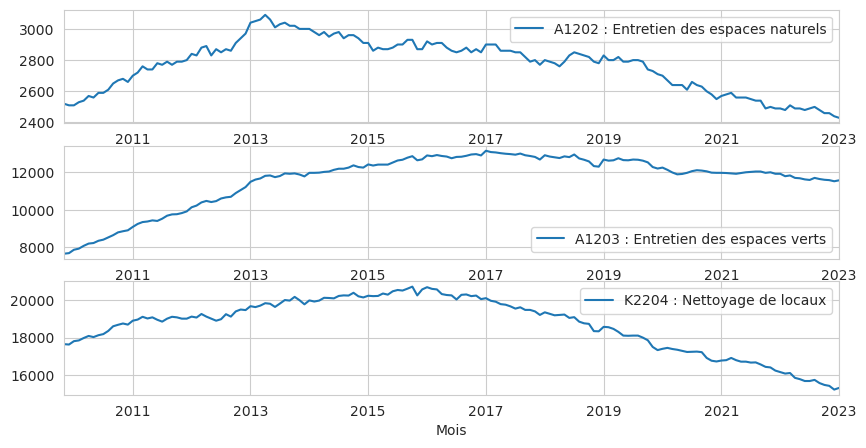

In [66]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,figsize = (10,5))
sns.set_style("whitegrid")
data.loc[:,["Mois","A1202 : Entretien des espaces naturels"]].plot(x="Mois",ax = ax1)
data.loc[data.index > pd.d:,["Mois","A1203 : Entretien des espaces verts"]].plot(x="Mois",ax = ax2)
data.loc[:,["Mois","K2204 : Nettoyage de locaux"]].plot(x="Mois",ax = ax3)


In [64]:
data.describe().loc["max",:].sort_values(ascending = False).to_csv("res.csv")